<a href="https://colab.research.google.com/github/marcin119a/PODSTAWY-UCZENIA-MASZYNOWEGO-W-PYTHONIE-/blob/main/Podsumowanie_Kursu_i_Zastosowanie_algorytm%C3%B3w.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Zadanie prognozowanie ceny indeksu

Wykorzystując zbiór danych dowjones.csv, który zawiera informacje o dacie i cenie indeksu Dow Jones Industrial Average, przygotuj model rekurencyjnej sieci neuronowej do prognozowania szeregu czasowego. Wykorzystaj bibliotekę Keras do zbudowania modelu. Zbadaj wpływ różnych architektur sieci, takich jak liczba warstw rekurencyjnych, liczba neuronów w warstwach, funkcje aktywacji oraz techniki regularyzacji (np. Dropout), na jakość prognoz. Przeprowadź eksperymenty i porównaj wyniki różnych konfiguracji sieci.

Poniżej przedstawiam przykładowe rozwiązanie tego zadania:

Najpierw należy wczytać zbiór danych dowjones.csv:

In [ ]:
import pandas as pd

downjones = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/dowjones.csv')

In [ ]:
downjones.head()

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45


<Axes: xlabel='Date', ylabel='Price'>

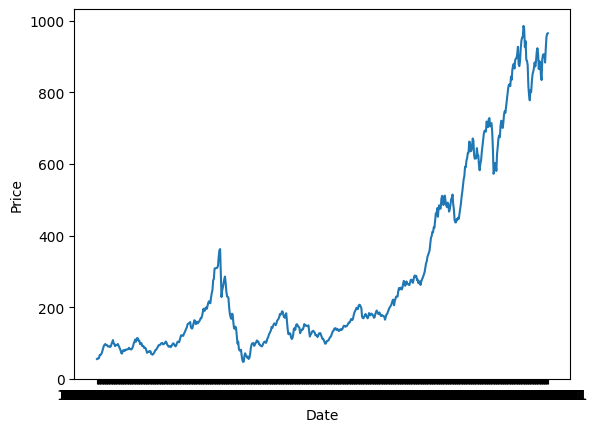

In [ ]:
import seaborn as sns 

sns.lineplot(data=downjones, x=downjones['Date'], y=downjones['Price'])

In [ ]:
downjones = downjones.set_index('Date')


In [ ]:
# importowanie potrzebnych bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler


# wczytanie danych
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/dowjones.csv')

# konwersja daty na format datetime i ustawienie jej jako indeks
df['Date'] = pd.to_datetime(df['Date'])
# przygotowanie danych treningowych i testowych
df = df.set_index('Date')



In [ ]:
df

,Price
Date,
1914-12-01,55.00
1915-01-01,56.55
1915-02-01,56.00
1915-03-01,58.30
1915-04-01,66.45
...,...
1968-08-01,883.72
1968-09-01,922.80
1968-10-01,955.47


In [ ]:
# Normalizacja danych
scaler = MinMaxScaler()
data = scaler.fit_transform(df)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import mean_squared_error


size = int(len(data) * 0.75)

train_data, test_data = data[0:size], data[size:len(data)]



def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i+time_steps)])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)


# Zmniejszenie wymiarowości danych
window_size = 12
X_train, y_train = create_dataset(train_data, train_data, window_size)
X_test, y_test = create_dataset(test_data, test_data, window_size)



In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense


# Definicja modelu
model = Sequential()
model.add(LSTM(4, input_shape=(window_size, 1)))
model.add(Dense(1))

# Kompilacja modelu lr = 0.001
model.compile(loss='mean_squared_error', optimizer='adam')

# Trenowanie modelu
model.fit(X_train, y_train, epochs=10, batch_size=1)

# Ocena modelu
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)
print('Train Loss:', train_loss)
print('Test Loss:', test_loss)

# Predykcja
predictions = model.predict(X_test)

Epoch 1/10
474/474 [==============================] - 4s 4ms/step - loss: 5.1118e-04
Epoch 2/10
474/474 [==============================] - 2s 3ms/step - loss: 3.7812e-04
Epoch 3/10
474/474 [==============================] - 1s 3ms/step - loss: 3.4920e-04
Epoch 4/10
474/474 [==============================] - 1s 3ms/step - loss: 3.3025e-04
Epoch 5/10
474/474 [==============================] - 1s 3ms/step - loss: 3.0761e-04
Epoch 6/10
474/474 [==============================] - 1s 3ms/step - loss: 3.0051e-04
Epoch 7/10
474/474 [==============================] - 1s 3ms/step - loss: 2.8258e-04
Epoch 8/10
474/474 [==============================] - 2s 5ms/step - loss: 2.5618e-04
Epoch 9/10
474/474 [==============================] - 3s 5ms/step - loss: 2.3502e-04
Epoch 10/10
5/5 [==============================] - 0s 4ms/step - loss: 0.0016
Train Loss: 0.0002014357887674123
Test Loss: 0.001633662497624755
5/5 [==============================] - 1s 3ms/step


Text(0.5, 1.0, 'Sprzedaż w restauracji prognoza na zbiorze testowym')

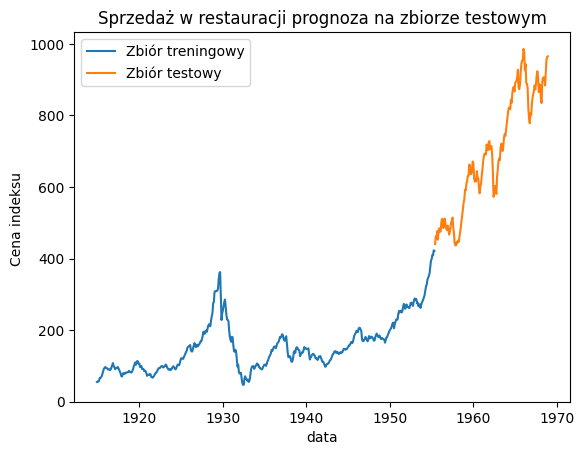

In [ ]:
plt.plot(df[0:size].index, df[0:size]['Price'], label='Zbiór treningowy')
plt.plot(df[size:len(df)].index, df[size:len(df)]['Price'], label='Zbiór testowy')
plt.legend()

plt.ylabel('Cena indeksu ')
plt.xlabel('data')
plt.title('Sprzedaż w restauracji prognoza na zbiorze testowym')

In [ ]:
y_pred = model.predict(X_test)
# Odwrotna normalizacja danych
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Obliczenie błędu średniokwadratowego (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

5/5 [==============================] - 0s 3ms/step
MSE: 1440.6806914446227


Text(0.5, 1.0, 'prognoza ceny indeksu na zbiorze testowym')

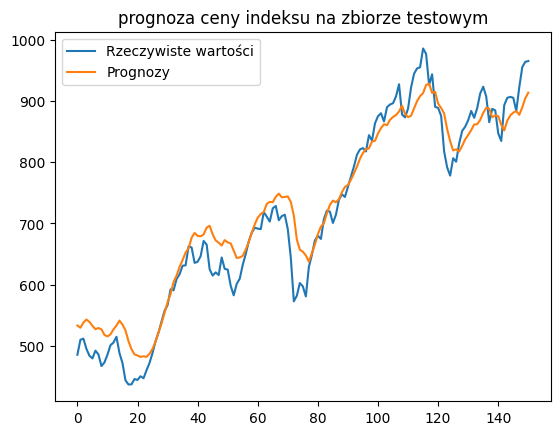

In [ ]:

# wizualizacja wyników predykcji
plt.plot(y_test, label='Rzeczywiste wartości')
plt.plot(y_pred, label='Prognozy')
plt.legend()
plt.title('prognoza ceny indeksu na zbiorze testowym')

Zadanie:

Klastrowanie zbioru danych "exercises" z biblioteki seaborn. Zbiór ten zawiera informacje o ćwiczeniach, takie jak identyfikator (id), rodzaj diety (diet), puls (pulse), czas (time) i rodzaj ćwiczenia (kind). Przygotuj model klastrowania, który wykorzysta atrybuty puls, czas i rodzaj ćwiczenia do identyfikacji podobnych grup ćwiczeń. Wykorzystaj bibliotekę K-means do klastrowania. Przeprowadź analizę i zwizualizuj wyniki grupowania.

Poniżej przedstawiam przykładowe rozwiązanie tego zadania:

Najpierw należy wczytać zbiór danych "exercises" i dokonać niezbędnej obróbki:


In [ ]:

import pandas as pd

# Wczytaj zbiór danych
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/exercise.csv')
# get the dummies and store it in a variable
time = {"1 min": 1, "15 min": 15, "30 min": 30}
kind = {"rest": 0, "walking": 1, "running": 2}


df['time'] = df['time'].map(time)
df['kind'] = df['kind'].map(kind)
# Wyświetl pierwsze kilka wierszy zbioru danych
df.head()



,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1,0
1,1,1,low fat,85,15,0
2,2,1,low fat,88,30,0
3,3,2,low fat,90,1,0
4,4,2,low fat,92,15,0


Następnie, przygotuj dane do klastrowania, wybierając odpowiednie atrybuty i przekształcając je w postać numeryczną:


In [ ]:
from sklearn.preprocessing import LabelEncoder


# Wyodrębnij wybrane atrybuty
data = df[['pulse', 'time', 'kind']]

# Wyświetl pierwsze kilka wierszy przetworzonych danych
data.head()


,pulse,time,kind
0,85,1,0
1,85,15,0
2,88,30,0
3,90,1,0
4,92,15,0


3. Następnie, wykonaj skalowanie danych, aby zapewnić jednolite zakresy wartości dla każdego atrybutu:


In [ ]:
from sklearn.preprocessing import StandardScaler

# Wykonaj skalowanie danych
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Wyświetl pierwsze kilka wierszy przeskalowanych danych
print(scaled_data[:5])


[[-0.99487718 -1.21042749 -1.22474487]
 [-0.99487718 -0.02814948 -1.22474487]
 [-0.79184102  1.23857697 -1.22474487]
 [-0.65648358 -1.21042749 -1.22474487]
 [-0.52112614 -0.02814948 -1.22474487]]


4. Po przetworzeniu danych, można zastosować algorytm K-means do wykonania klastrowania:


In [ ]:



from sklearn.cluster import KMeans

# Zdefiniuj liczbę klastrów
n_clusters = 3

# Utwórz instancję algorytmu K-means
kmeans = KMeans(n_clusters=n_clusters, n_init=2)

# Dokonaj klastrowania
kmeans.fit(scaled_data)

# Przypisz etykiety klastrów do danych
cluster_labels = kmeans.labels_

# Wyświetl etykiety klastrów
print(cluster_labels)


[1 1 2 1 1 2 1 1 2 1 1 2 1 1 2 1 1 2 1 1 2 1 1 2 1 1 2 1 1 2 1 1 2 1 1 2 1
 1 2 1 1 2 1 1 2 1 1 2 1 0 2 1 1 2 1 1 2 1 1 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]




Na koniec, można zwizualizować wyniki grupowania:


Wykres punktowy przedstawia klastry na podstawie atrybutów 'pulse'

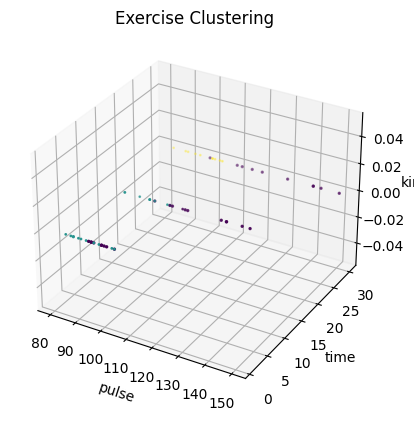

In [ ]:

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Przygotuj wykresy punktowe dla dwóch atrybutów
plt.scatter(data['pulse'], data['time'], data['kind'], c=cluster_labels, cmap='viridis')
ax.set_xlabel('pulse')
ax.set_ylabel('time')
ax.set_zlabel('kind')

plt.title('Exercise Clustering')
plt.show()

In [ ]:
data

,pulse,time,kind
0,85,1,0
1,85,15,0
2,88,30,0
3,90,1,0
4,92,15,0
...,...,...,...
85,135,15,2
86,130,30,2
87,99,1,2
88,111,15,2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Podziel dane na zbiór treningowy i testowy
X = data[['time','kind']]
y = data['pulse']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Utwórz model regresji liniowej
model = LinearRegression()

# Trenuj model na danych treningowych
model.fit(X_train, y_train)

# Wykonaj predykcję na danych testowych
y_pred = model.predict(X_test)

# Oblicz współczynniki RMSE i R^2
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Wyświetl wyniki
print('RMSE:', rmse)
print('R^2:', r2)


RMSE: 8.055558841928399
R^2: 0.6760597628055321


In [ ]:
X_test.shape

(9, 2)

### Zadanie :

Wykorzystując zbiór danych "exercises" z biblioteki seaborn, przygotuj model sieci neuronowej do przewidywania wartości pulsacji (pulse) na podstawie atrybutu czasu (time) i rodzaju stanu (kind). Przeprowadź analizę wykorzystując sieć neuronową, oceniając jakość modelu i wizualizując wyniki.

Poniżej przedstawiam przykładowe rozwiązanie tego zadania:

Najpierw należy wczytać zbiór danych "exercises" i dokonać niezbędnej obróbki:

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

# Zastosuj skalowanie Min-Max do danych treningowych i testowych
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Zbuduj model sieci neuronowej
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))

# Kompiluj model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Trenuj model na danych treningowych
model.fit(X_train_scaled, y_train, epochs=10, batch_size=1, verbose=1)

# Wykonaj predykcję na danych testowych
y_pred = model.predict(X_test_scaled)

# Oblicz współczynniki RMSE i R^2
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Wyświetl wyniki
print('RMSE:', rmse)
print('R^2:', r2)


Epoch 1/10
81/81 [==============================] - 0s 1ms/step - loss: 9235.6748
Epoch 2/10
81/81 [==============================] - 0s 1ms/step - loss: 2527.7715
Epoch 3/10
81/81 [==============================] - 0s 1ms/step - loss: 309.2391
Epoch 4/10
81/81 [==============================] - 0s 2ms/step - loss: 257.6196
Epoch 5/10
81/81 [==============================] - 0s 2ms/step - loss: 231.9235
Epoch 6/10
81/81 [==============================] - 0s 3ms/step - loss: 208.2355
Epoch 7/10
81/81 [==============================] - 0s 3ms/step - loss: 173.7357
Epoch 8/10
81/81 [==============================] - 0s 2ms/step - loss: 165.4565
Epoch 9/10
81/81 [==============================] - 0s 3ms/step - loss: 145.1090
Epoch 10/10
1/1 [==============================] - 0s 57ms/step
RMSE: 8.393071156094758
R^2: 0.6483461655409312


### Zadanie: Klasyfikacja danych FashionMNIST z wykorzystaniem konwolucji 1D

Opis zadania:
Twoim zadaniem jest przygotowanie modelu klasyfikacji dla zbioru danych FashionMNIST, wykorzystując konwolucję 1D. Zbiór ten zawiera obrazy przedstawiające różne rodzaje odzieży. Twoim celem jest stworzenie modelu, który będzie w stanie rozpoznać rodzaj odzieży na podstawie danych obrazowych.

Instrukcje:
1. Zaimportuj wymagane biblioteki, takie jak numpy, keras i tensorflow.

2. Załaduj zbiór danych FashionMNIST, korzystając z dostępnych funkcji w bibliotece keras.

3. Przetwórz dane, skalując wartości pikseli do zakresu od 0 do 1.

4. Przygotuj dane do konwolucji 1D. W przypadku danych obrazowych, konwolucja 1D może być stosowana do przetwarzania danych wzdłuż jednego wymiaru (np. szerokość obrazu). W przypadku zbioru danych FashionMNIST, możemy potraktować szerokość obrazu jako jednowymiarowy sygnał.

5. Zdefiniuj model klasyfikacji z wykorzystaniem warstw konwolucji 1D, warstw aktywacji i warstw redukcji rozmiaru (pooling). Możesz eksperymentować z różnymi architekturami modelu, dodając więcej warstw konwolucji 1D lub warstw gęstych.

6. Skompiluj model, określając funkcję straty, optymalizator i metryki do oceny modelu.

7. Trenuj model na danych treningowych. Dobierz odpowiednią liczbę epok i rozmiar partii (batch size) dla treningu.

8. Ocena modelu na zbiorze testowym. Oblicz dokładność (accuracy) modelu na danych testowych, aby ocenić jego skuteczność.

Poniżej znajduje się przykładowy kod przedstawiający implementację zadania związane z konwolucją 1D dla zbioru danych FashionMNIST:



In [ ]:
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam


# Załaduj zbiór danych FashionMNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Przetwórz dane
X_train = X_train / 255.0
X_test = X_test / 255.0


# Zakoduj etykiety klas
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Zdefiniuj model
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(28, 28)))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# kompilacja modelu
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# trening modelu
model.fit(X_train, y_train, batch_size=64, epochs=3, verbose=1)

# ocena modelu na zbiorze testowym
score = model.evaluate(X_test, y_test, verbose=0)

# wypisanie wyniku
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/3
938/938 [==============================] - 6s 5ms/step - loss: 0.6814 - accuracy: 0.7564
Epoch 2/3
938/938 [==============================] - 5s 6ms/step - loss: 0.4718 - accuracy: 0.8291
Epoch 3/3
938/938 [==============================] - 5s 6ms/step - loss: 0.4290 - accuracy: 0.8451
Test loss: 0.37768110632896423
Test accuracy: 0.8587999939918518


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


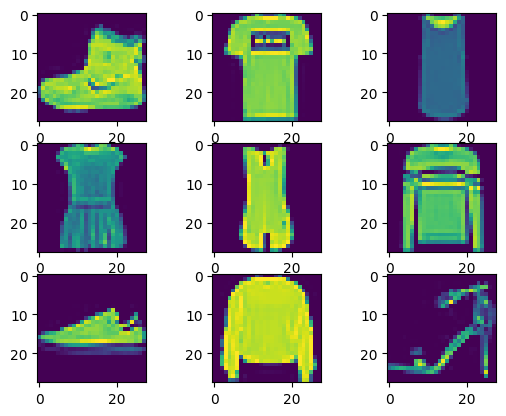

In [ ]:
from keras.datasets import fashion_mnist
# example of loading the fashion_mnist dataset
from matplotlib import pyplot

# load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(X_train[i])
# show the figure
pyplot.show()

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)